In [1]:
%matplotlib inline

import tensorflow as tf
import menpo.io as mio

In [2]:
image = tf.placeholder(tf.float32, shape=(None, None, 3), name='images')
initial_bb = tf.placeholder(tf.float32, shape=(4), name='inits')

In [ ]:
!wget https://www.doc.ic.ac.uk/~gt108/theano_mdm.pb --no-check-certificate

In [3]:
MDM_MODEL_PATH = 'theano_mdm.pb'

with open(MDM_MODEL_PATH, 'rb') as f:
    graph_def = tf.GraphDef.FromString(f.read())
    pred,  = tf.import_graph_def(graph_def, input_map={"image": image, "bounding_box": initial_bb}, return_elements=['prediction:0'])

In [4]:
sess = tf.InteractiveSession()

In [5]:
im = mio.import_image('image_0012.png')

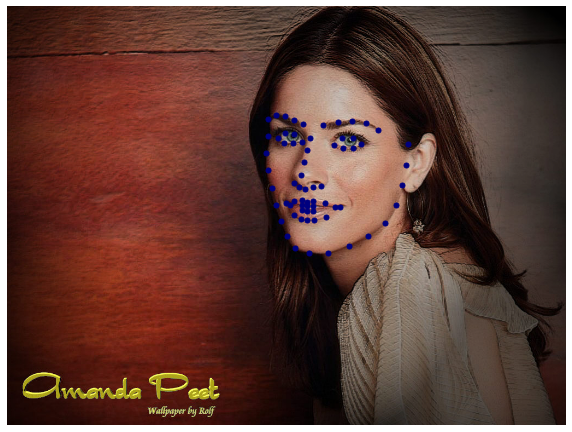

In [6]:
bb = im.landmarks['PTS'].lms.bounding_box().points[[0, 2]].ravel()
p  = sess.run(pred, feed_dict={image: im.pixels.transpose(1, 2, 0), initial_bb: bb})
i = menpo.image.Image(im.pixels)
i.landmarks['pred'] = menpo.shape.PointCloud(p[0])
i.view_landmarks()